# Team C10
## 5th Semester 'C' Div
## School Of Computer Science and Engineering
## Project Id: 5DMACP16

# Project Details

## Predicting response times of the Paris Fire Brigade vehicles

### Our task is to predict the delay between the selection of a rescue vehicle and the time 
### when it arrives at the scene of the rescue request.

# Team Details


## Team Leader : Shantanu Kumar 203 01FE17BCS181 
## Team Members:
### Satwik Belaldavar          200  01FE17BCS178 
### Samay D Naik                190   01FE17BCS168
### Shivam Wadhera            210  01FE17BCS189


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data= pd.read_csv("x_test.csv")
data.shape

(108033, 26)

In [5]:
data.shape[0]

219337

In [4]:
pd.isnull(data).sum().sum()

534210

In [7]:
pd.isnull(data).sum()

emergency vehicle selection                             0
intervention                                            0
alert reason category                                   0
alert reason                                            0
intervention on public roads                            0
floor                                                   0
location of the event                               12710
longitude intervention                                  0
latitude intervention                                   0
emergency vehicle                                       0
emergency vehicle type                                  0
rescue center                                           0
selection time                                          0
date key sélection                                      0
time key sélection                                      0
status preceding selection                              0
delta status preceding selection-selection              0
departed from 

In [9]:
data[data.duplicated()]


,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,...,delta status preceding selection-selection,departed from its rescue center,longitude before departure,latitude before departure,delta position gps previous departure-departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration


In [10]:
data_nan = (data.isnull().sum()/data.shape[0])*100
data_nan[data_nan>0]

location of the event                               5.794736
delta position gps previous departure-departure    97.764627
GPS tracks departure-presentation                  69.998678
GPS tracks datetime departure-presentation         69.998678
dtype: float64

In [12]:
data.describe()

,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,rescue center,date key sélection,time key sélection,delta status preceding selection-selection,departed from its rescue center,longitude before departure,latitude before departure,delta position gps previous departure-departure,OSRM estimated distance,OSRM estimated duration
count,2.193370e+05,2.193370e+05,219337.000000,219337.000000,219337.000000,219337.000000,206627.000000,219337.000000,219337.000000,219337.000000,219337.000000,2.193370e+05,219337.000000,2.193370e+05,219337.000000,219337.000000,219337.000000,4903.000000,219337.000000,219337.000000
mean,5.074131e+06,1.321755e+07,3.088243,2228.383196,0.146514,1.201772,153.543182,2.366876,48.859919,4560.668747,4902.916580,2.018065e+07,133878.355243,1.695788e+04,0.977646,2.366780,48.859771,19.786865,2238.134131,243.543657
std,2.221668e+05,3.499604e+05,1.400011,1630.641656,0.353622,2.500414,40.797656,0.086107,0.049105,1236.274169,25219.717173,3.545131e+02,64680.001994,4.992957e+04,0.147831,0.084711,0.048519,11.345221,1591.647524,133.756794
min,4.713701e+06,1.264949e+07,1.000000,1911.000000,0.000000,-10.000000,100.000000,2.146608,48.689016,1815.000000,2418.000000,2.018010e+07,0.000000,0.000000e+00,0.000000,2.093597,48.711723,0.000000,0.800000,0.100000
25%,4.881511e+06,1.291295e+07,3.000000,2112.000000,0.000000,0.000000,136.000000,2.306414,48.829362,4187.000000,2449.000000,2.018032e+07,91604.000000,1.434000e+03,1.000000,2.305704,48.831225,10.000000,1221.100000,153.900000
50%,5.057150e+06,1.319092e+07,3.000000,2135.000000,0.000000,0.000000,139.000000,2.359659,48.863684,4538.000000,2472.000000,2.018062e+07,140753.000000,4.470000e+03,1.000000,2.361823,48.864165,20.000000,1866.800000,219.100000
75%,5.291220e+06,1.356532e+07,3.000000,2162.000000,0.000000,2.000000,148.000000,2.415287,48.892817,5729.000000,2488.000000,2.018101e+07,190032.000000,1.338800e+04,1.000000,2.406789,48.891143,30.000000,2834.600000,305.700000
max,5.462033e+06,1.382259e+07,9.000000,93529.000000,1.000000,100.000000,325.000000,2.601520,49.010871,6092.000000,266326.000000,2.018123e+07,235959.000000,2.587244e+06,1.000000,2.574861,49.015576,39.000000,42752.800000,2751.700000


In [13]:
data.dtypes

emergency vehicle selection                          int64
intervention                                         int64
alert reason category                                int64
alert reason                                         int64
intervention on public roads                         int64
floor                                                int64
location of the event                              float64
longitude intervention                             float64
latitude intervention                              float64
emergency vehicle                                    int64
emergency vehicle type                              object
rescue center                                        int64
selection time                                      object
date key sélection                                   int64
time key sélection                                   int64
status preceding selection                          object
delta status preceding selection-selection           int

(array([ 21270.,   5705., 176787.,   1221.,      0.,    781.,   4814.,
           901.,    377.,   7481.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

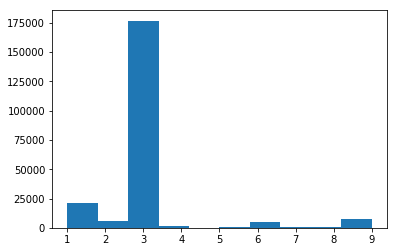

In [4]:
plt.hist(data['alert reason category'])

### Alert Reasons Distribution

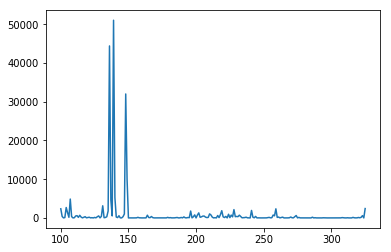

In [20]:
plt.plot(data.groupby('location of the event').count()[['emergency vehicle selection']])

### Which location had maximum number of firefighter vehicle intervene

In [21]:
data['location of the event'].value_counts()

139.0    51031
136.0    44400
148.0    31997
149.0     9905
140.0     5237
107.0     4869
137.0     4679
131.0     3130
104.0     2687
325.0     2413
100.0     2357
259.0     2349
228.0     2142
241.0     1932
219.0     1866
135.0     1796
196.0     1776
105.0     1354
202.0     1297
210.0     1040
147.0     1024
224.0      945
218.0      842
199.0      785
211.0      763
257.0      749
201.0      747
226.0      727
164.0      709
232.0      706
         ...  
250.0        3
154.0        3
282.0        3
285.0        3
292.0        2
153.0        2
159.0        2
183.0        2
245.0        2
124.0        2
279.0        2
299.0        2
311.0        2
297.0        2
313.0        2
315.0        2
109.0        2
284.0        1
213.0        1
293.0        1
151.0        1
265.0        1
247.0        1
248.0        1
215.0        1
290.0        1
160.0        1
324.0        1
200.0        1
302.0        1
Name: location of the event, Length: 210, dtype: int64

In [105]:
e1 = data.groupby('location of the event').count()[['emergency vehicle selection']]

In [114]:
e1[e1['emergency vehicle selection']==51031]

,emergency vehicle selection
location of the event,
139.0,51031


In [43]:
data.dtypes

emergency vehicle selection                          int64
intervention                                         int64
alert reason category                                int64
alert reason                                         int64
intervention on public roads                         int64
floor                                                int64
location of the event                              float64
longitude intervention                             float64
latitude intervention                              float64
emergency vehicle                                    int64
emergency vehicle type                              object
rescue center                                        int64
selection time                                      object
date key sélection                                   int64
time key sélection                                   int64
status preceding selection                          object
delta status preceding selection-selection           int

In [7]:
data['emergency vehicle type'].nunique()

75

In [4]:
data.corr()

,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,rescue center,date key sélection,time key sélection,delta status preceding selection-selection,departed from its rescue center,longitude before departure,latitude before departure,delta position gps previous departure-departure,OSRM estimated distance,OSRM estimated duration
emergency vehicle selection,1.000000,0.999963,-0.012846,-0.008020,0.015186,-0.009128,0.001106,0.003196,0.000282,0.051553,0.002443,0.998241,0.000486,-0.002872,-0.001563,0.003346,-0.000396,0.019088,0.022886,0.022682
intervention,0.999963,1.000000,-0.012692,-0.007990,0.015319,-0.009101,0.001087,0.003216,0.000303,0.051835,0.002495,0.998229,0.000420,-0.002749,-0.001526,0.003364,-0.000384,0.018996,0.022876,0.022666
alert reason category,-0.012846,-0.012692,1.000000,0.168381,-0.063025,0.082536,-0.077027,-0.014931,-0.020865,-0.068819,0.005843,-0.012977,0.025712,0.021638,0.006645,-0.014677,-0.018565,-0.018728,-0.025948,-0.022129
alert reason,-0.008020,-0.007990,0.168381,1.000000,-0.017644,0.009352,-0.015308,-0.005842,-0.003883,-0.015516,0.012499,-0.008088,-0.000052,0.015351,0.001150,-0.005489,-0.001372,-0.023127,0.022774,0.023524
intervention on public roads,0.015186,0.015319,-0.063025,-0.017644,1.000000,-0.197776,-0.034273,-0.019302,0.027573,0.021377,-0.023260,0.015648,0.003912,-0.039312,0.000642,-0.018729,0.026387,0.001815,-0.073699,-0.074695
floor,-0.009128,-0.009101,0.082536,0.009352,-0.197776,1.000000,-0.207471,-0.054535,-0.000027,-0.011694,-0.026403,-0.009333,-0.017976,0.001567,0.008576,-0.052899,-0.000072,0.004658,-0.071589,-0.063506
location of the event,0.001106,0.001087,-0.077027,-0.015308,-0.034273,-0.207471,1.000000,-0.040494,0.002305,0.039254,-0.010403,0.001389,0.025247,-0.036603,-0.014180,-0.037829,0.002116,0.013344,-0.021990,-0.024418
longitude intervention,0.003196,0.003216,-0.014931,-0.005842,-0.019302,-0.054535,-0.040494,1.000000,-0.004002,0.070401,0.116857,0.003178,-0.002082,-0.006966,-0.003979,0.977009,-0.002441,-0.014499,0.142606,0.094213
latitude intervention,0.000282,0.000303,-0.020865,-0.003883,0.027573,-0.000027,0.002305,-0.004002,1.000000,-0.009833,0.113703,0.000345,-0.005173,-0.023822,-0.011474,-0.005555,0.972077,0.021573,-0.062935,-0.127754
emergency vehicle,0.051553,0.051835,-0.068819,-0.015516,0.021377,-0.011694,0.039254,0.070401,-0.009833,1.000000,0.008995,0.051611,-0.053130,-0.145479,-0.029371,0.074314,-0.007491,-0.014011,0.014280,0.014975


In [8]:
data['emergency vehicle selection'].nunique()

219337

D:\Softwares\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


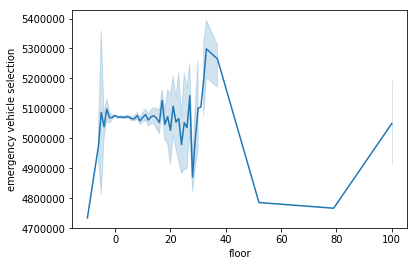

In [18]:
sns.lineplot(y='emergency vehicle selection',x='floor',data=data)

### No of Times a particular vehicle has done floor intervention

In [37]:
data.groupby('emergency vehicle type').count()['floor']

emergency vehicle type
AR               2583
BEAA BSPP         567
CA                 14
CCR BSPP         1428
CD BSPP            81
CESD               25
CFS                 8
CMO APP             4
CRAC              380
CRF              1425
CSP                 1
DAP                 1
DEP                26
EPA BSPP         2054
EPAN             1966
EPSA              477
ESAV               11
ESAVI               7
FA               2526
FFSS              126
FMOGP BSPP         23
FNPC              863
FPT BSPP         4107
FPT SSLIA           1
FPTL BSPP         317
OHFOM              83
PEV                61
PSE             32927
PST                18
SFCB               50
                ...  
UMH NECKPED         2
UMH PITIE           9
UMH STDE            1
UMPS               29
VAS                 1
VE2I               56
VEC                 6
VELD                1
VID               808
VIGI                3
VIMP               23
VIRB                1
VLHP               53
VLR BSPP 

In [ ]:
#No of times each vehicle being used in emergency

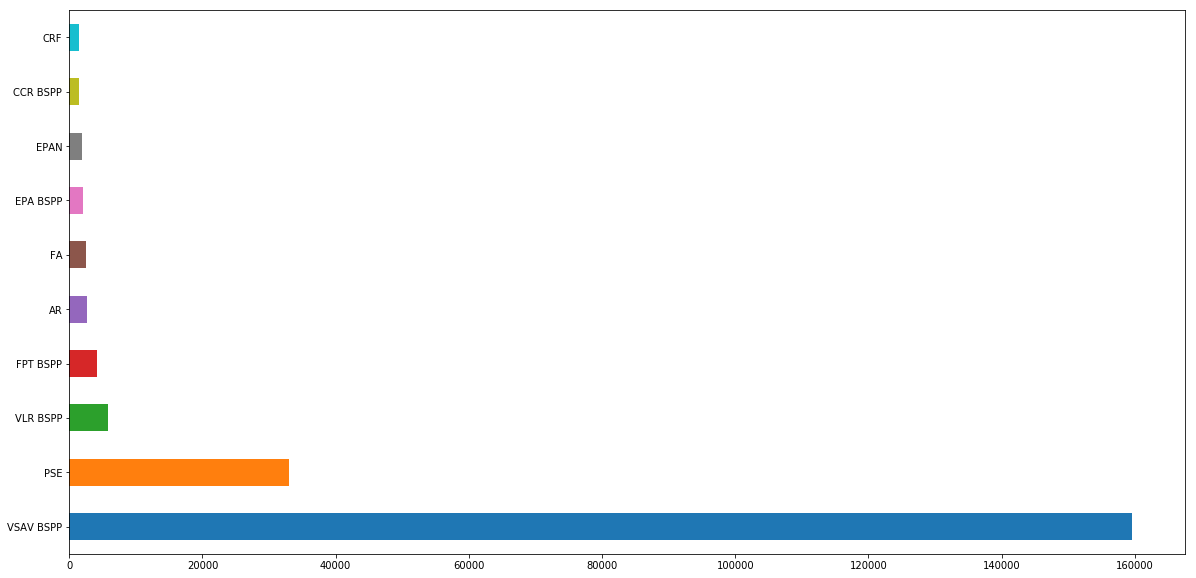

In [63]:
data['emergency vehicle type'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

In [ ]:
#No of vehicles in each rescue center for first 30 rescue centers

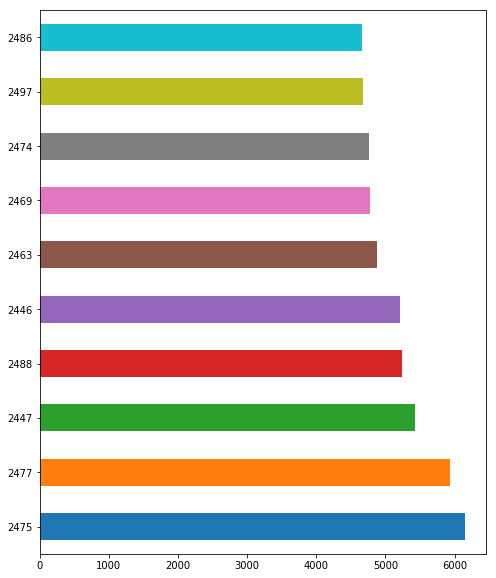

In [5]:
data['rescue center'].value_counts().head(10).plot(kind='barh', figsize=(8,10))

In [7]:
data['rescue center'].value_counts().sum()

219337

In [39]:
data.groupby('departed from its rescue center').count()

,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,...,status preceding selection,delta status preceding selection-selection,longitude before departure,latitude before departure,delta position gps previous departure-departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration
departed from its rescue center,,,,,,,,,,,,,,,,,,,,,
0,4903,4903,4903,4903,4903,4903,4553,4903,4903,4903,...,4903,4903,4903,4903,4903,4813,4813,4903,4903,4903
1,214434,214434,214434,214434,214434,214434,202074,214434,214434,214434,...,214434,214434,214434,214434,0,60991,60991,214434,214434,214434


In [22]:
data['DateTime'] = pd.to_datetime(data['date key sélection'].astype(str),format ='%Y%m%d')

In [36]:
data['Month']  = data['DateTime'].dt.month

In [37]:
data

,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,...,longitude before departure,latitude before departure,delta position gps previous departure-departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,DateTime,Month
0,5105452,13264186,3,2162,0,0,148.0,2.284796,48.879669,4511,...,2.288053,48.884698,NaN,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,2018-07-08,7
1,4720915,12663715,3,2124,0,1,136.0,2.247464,48.818191,4327,...,2.268519,48.823958,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,2018-01-04,1
2,5365374,13675521,3,2163,0,2,139.0,2.258328,48.836759,4509,...,2.272944,48.850498,33.0,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,2018-11-16,11
3,4741586,12695745,3,2162,0,0,136.0,2.393832,48.776526,5731,...,2.388940,48.787732,NaN,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,2018-01-15,1
4,5381209,13698743,3,2162,0,3,104.0,2.458610,48.875751,5623,...,2.439331,48.863814,NaN,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,2018-11-24,11
5,4731603,12680636,3,2112,0,1,157.0,2.349774,48.829965,4319,...,2.343757,48.837382,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""itaiHgyhMf...",1685.8,187.7,2018-01-09,1
6,5196431,13415648,9,2711,0,4,136.0,2.465018,48.859299,4215,...,2.439331,48.863814,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",3186.7,301.5,2018-08-24,8
7,4774057,12744692,3,2162,0,0,136.0,2.585503,48.784338,5883,...,2.531216,48.807955,NaN,"2.530139,48.806221;2.541472,48.801029;2.554639...",2018-01-30 07:45:15;2018-01-30 07:46:27;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""sx{hHuemNv...",5773.8,541.8,2018-01-30,1
8,5277444,13544161,3,2113,1,0,148.0,2.270171,48.888965,4511,...,2.288053,48.884698,NaN,"2.289194,48.885334;2.287528,48.884304;2.282444...",2018-10-05 08:29:18;2018-10-05 08:30:30;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}Ls...",1998.9,160.8,2018-10-05,10
9,5277017,13543445,3,2112,0,0,199.0,2.403059,48.870044,5998,...,2.373812,48.865868,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""ccgiHutnMl...",2623.9,272.4,2018-10-04,10


In [65]:
data.groupby('Month').count()['intervention on public roads']

Month
1     20767
2     18326
3     20206
4     18794
5     20166
6     20443
7     21339
8     17347
10    20524
11    20395
12    21030
Name: intervention on public roads, dtype: int64

D:\Softwares\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Softwares\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


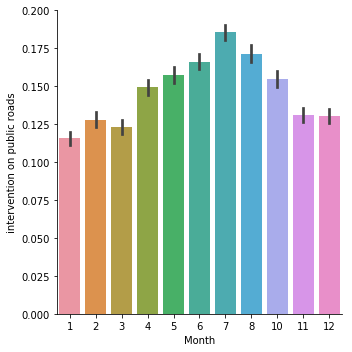

In [68]:
sns.factorplot(y='intervention on public roads',x='Month',data = data,kind = 'bar')

D:\Softwares\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


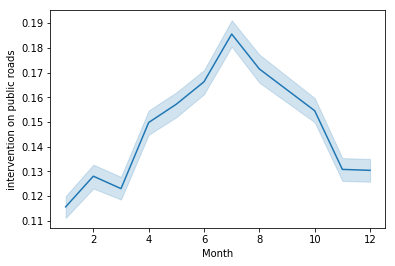

In [73]:
#Intervention on public roads during each month
sns.lineplot(y='intervention on public roads',x='Month',data=data)

In [10]:
data_combined = pd.merge(x_train, y_train)
data_combined.head()

,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,...,latitude before departure,delta position gps previous departure-departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation
0,5105452,13264186,3,2162,0,0,148.0,2.284796,48.879669,4511,...,48.884698,NaN,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410
1,4720915,12663715,3,2124,0,1,136.0,2.247464,48.818191,4327,...,48.823958,NaN,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461
2,5365374,13675521,3,2163,0,2,139.0,2.258328,48.836759,4509,...,48.850498,33.0,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490
3,4741586,12695745,3,2162,0,0,136.0,2.393832,48.776526,5731,...,48.787732,NaN,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328
4,5381209,13698743,3,2162,0,3,104.0,2.458610,48.875751,5623,...,48.863814,NaN,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661


In [11]:
data_combined.corr()

,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,...,delta status preceding selection-selection,departed from its rescue center,longitude before departure,latitude before departure,delta position gps previous departure-departure,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation
emergency vehicle selection,1.000000,0.999963,-0.012846,-0.008020,0.015186,-0.009128,0.001106,0.003196,0.000282,0.051553,...,-0.002872,-0.001563,0.003346,-0.000396,0.019088,0.022886,0.022682,0.017326,0.022646,0.026803
intervention,0.999963,1.000000,-0.012692,-0.007990,0.015319,-0.009101,0.001087,0.003216,0.000303,0.051835,...,-0.002749,-0.001526,0.003364,-0.000384,0.018996,0.022876,0.022666,0.017320,0.022534,0.026697
alert reason category,-0.012846,-0.012692,1.000000,0.168381,-0.063025,0.082536,-0.077027,-0.014931,-0.020865,-0.068819,...,0.021638,0.006645,-0.014677,-0.018565,-0.018728,-0.025948,-0.022129,0.036247,0.045245,0.054071
alert reason,-0.008020,-0.007990,0.168381,1.000000,-0.017644,0.009352,-0.015308,-0.005842,-0.003883,-0.015516,...,0.015351,0.001150,-0.005489,-0.001372,-0.023127,0.022774,0.023524,0.023419,0.027587,0.033390
intervention on public roads,0.015186,0.015319,-0.063025,-0.017644,1.000000,-0.197776,-0.034273,-0.019302,0.027573,0.021377,...,-0.039312,0.000642,-0.018729,0.026387,0.001815,-0.073699,-0.074695,-0.016129,-0.057065,-0.058743
floor,-0.009128,-0.009101,0.082536,0.009352,-0.197776,1.000000,-0.207471,-0.054535,-0.000027,-0.011694,...,0.001567,0.008576,-0.052899,-0.000072,0.004658,-0.071589,-0.063506,0.012922,0.002170,0.006167
location of the event,0.001106,0.001087,-0.077027,-0.015308,-0.034273,-0.207471,1.000000,-0.040494,0.002305,0.039254,...,-0.036603,-0.014180,-0.037829,0.002116,0.013344,-0.021990,-0.024418,-0.076043,-0.046528,-0.066739
longitude intervention,0.003196,0.003216,-0.014931,-0.005842,-0.019302,-0.054535,-0.040494,1.000000,-0.004002,0.070401,...,-0.006966,-0.003979,0.977009,-0.002441,-0.014499,0.142606,0.094213,0.024828,0.040480,0.045948
latitude intervention,0.000282,0.000303,-0.020865,-0.003883,0.027573,-0.000027,0.002305,-0.004002,1.000000,-0.009833,...,-0.023822,-0.011474,-0.005555,0.972077,0.021573,-0.062935,-0.127754,0.022865,-0.000825,0.006531
emergency vehicle,0.051553,0.051835,-0.068819,-0.015516,0.021377,-0.011694,0.039254,0.070401,-0.009833,1.000000,...,-0.145479,-0.029371,0.074314,-0.007491,-0.014011,0.014280,0.014975,-0.045272,-0.010040,-0.023894
